<a href="https://colab.research.google.com/github/jane95924/WEEK_8_IP/blob/master/WEEK_8_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HYPOTHYROIDISM PREDICTION

OVERVIEW

nairobi hospital conducted a clinical camp to test for hypothyroidism. the data focuses on thyroid patients. we are using this data to accomplish the following

build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

  part 1: build decision trees

  part 2: SVM

DEFINING THE QUESTION
1. SPECIFYING THE QUESTION

predict if the symptoms of a patient indicates that the patient has hypothyroid.

2. METRICS OF SUCCESS

This is a medical dataset. we are diagnosing if the variables we have indicate that the patient has hypothyroidism. a high accuracy is what we expect , not so accurate model means wrong diagnosing and would give rise to wrong medication which can cost lifes.
in our prediction, an accuracy of 80% is a good accuracy score to say our model is realiable and it is successful. 
3. CONTEXT

thyroid is a located at the bottom of the throat that produces two active thyroid hormones,triiodothyroxine (T3) and levothyroxine(T4). under and over production of the two hormones makes someone sick. hypothyroidism is under production and hyperthyroidism is under production of the hormones. the dataset provided by nairobi hospital will help us determine an indication of a patient having hypothyroidism or not hypothyroidism.
4. EXPERIMENTAL DESIGN

a. Loading data and initial exploration
   load the uploaded data
   review the columns, the head and tail,
   check the data types

b. Data Cleaning

  check for null values and deal with them

  check for duplicate values and deal with them

c.EDA

  Univariate analysis

  bivariate analysis

  multivariate analysis

d. MODELLING

   decision trees

   support vector machine

e. conclusion and challenging the solution

5. Data Relevance

our dataset has 3163 rows and 26 columns . a description of the columns is not provided. from general knowlegde, i understand what some mean,the age,sex,status. 
i did research on hypothyroidism and got to understand some terms used in the columns, some were not entirely clear. the dataset captures most of the things required to diagnose someone for  hypothyroidism .
the dataset has so many missing values, we find a way to deal with this so that we have the right diagnosis and ensure we do not have insufficient data.
 most of the variables are negative , we will work with this since hypothyroidism is not deadly, can be chronic and give rise to other diseases but few people go to get checked. 
the data types are all objects but we will change this to the appropriate data types so as to answer the question.

6. External data source validation

a similar dataset from datahub, the link 'https://datahub.io/machine-learning/sick/r/1.html' . the dataset has almost similar columns.
i could not specifically get the source of the dataset, but i did research on the condition . with the variables given , we can be able to identify or diagnose a patient for hypothyroidism.


In [1]:
#importing the libraries we will need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [90]:
#loading the uploaded data 
hypo = pd.read_csv('/content/hypothyroid.csv')
#previewing the head
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [3]:
#previewing the tail
hypo.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [4]:
#checking the shape of our dataset
hypo.shape

(3163, 26)

we have 26 columns and 3163 rows in our dataset

In [ ]:
#checking the columns in our dataset
hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

column description

status - tells us if the patient is negative or has hypothyroidism

age  - how old is the patient

sex - if the patient is male or female

on_thyroxine  -  True /False

query_on_thyroxine 

on_antithyroid_medication - if the patient is on medication

thyroid_surgery - if the patient has had thyroid surgery

query_hypothyroid

query_hyperthyroid

pregnant - if the patient is pregnant,true or false

sick - if the patient is sick,

tumor - if the patient has tumor

lithium 

goitre - if the patient has goitre
       
TSH_measured - if a blood test has been done to measure the hormone

TSH - thyroid stimulating hormone , tells the thyroid to release thyroid hormone to the blood.

T3_measured - if T3 measurement has been done

T3 - triiodothyronine , this is a thyroid hormone produced in the thyroid glands

TT4_measured

TT4 - thyroxine , the principla hormone from the thyroid gland.

T4U_measured - true / false

T4U  -  thyroid hormone produced in the thyroid glands(thyroxine)/levothyroxine

FTI_measured - if FTI has been measured

FTI - free thyroxine index, it is considered more indicator of thyroid, obtained by nultiplying Total T4 and T3 uptake.

TBG_measured - if TBG has been measured.

TBG  - thyroid binding globulin, binds thyroid hormones in circulation


In [ ]:
#checking the data type for each column
hypo.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

each column has an object data type. we will change this when cleaning.

##DATA CLEANING

In [ ]:
#check for null values
hypo.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

our function returns no null values in our dataset. we have question marks in the data. we can change that to NaN for the function to recognize that as null value.

In [ ]:
# previewing the unique values of each of our columns

columns = hypo.columns.to_list()

for column in columns:
    print("\n")
    print("Column Name:", column)
    print(hypo[column].unique())



Column Name: status
['hypothyroid' 'negative']


Column Name: age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


Column Name: sex
['M' 'F' '?']


Column Name: on_thyroxine
['f' 't']


Column Name: query_on_thyroxine
['f' 't']


Column Name: on_antithyroid_medication
['f' 't']


Column Name: thyroid_surgery
['f' 't']


Column Name: query_hypothyroid
['f' 't']


Column Name: query_hyperthyroid
['f' 't']


Column Name: pregnant
['f' 't']


Column Name: sick
['f' 't']


Column Name: tumor
['f' 't']


Column Name: lithium
['f' 't']


Column Name: goitre
['f' 't']


Column Name

from above, we see that some columns have '?', this means we have missing values, so we change that to nan 

In [5]:
#replacing the ? with nan
hypo.replace ('?',np.nan,inplace = True)

In [ ]:
#we now check for null values 
hypo.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

we have so many missing values in age,sex,TSH,T3, TT4, T4U,FTI and TBG columns. removing the null values will result in lose of too much data . we will be left with nothing to work on. we will fill them with the mean and mode.

we need to change the data types in the columns so that we can find the mean,mode and median

In [6]:
#changing the columns data type in the columns that we are using to float from object
float = np.array(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'])

for item in float:
    hypo = hypo.astype({item : 'float64'})
    print(item, ":", hypo[item].dtypes)

age : float64
TSH : float64
T3 : float64
TT4 : float64
T4U : float64
FTI : float64
TBG : float64


the column data types have been changed successfully.

In [7]:
# defining a function to use in replacing the null values
def fillnulls(dataframe_name, column_name,method):
    if method == 'mean':
        dataframe_name[column_name] = dataframe_name[column_name].fillna((dataframe_name[column_name].mean()))
    elif method=='median':
        dataframe_name[column_name] = dataframe_name[column_name].fillna((dataframe_name[column_name].median()))
    elif method=='mode':
        dataframe_name[column_name] = dataframe_name[column_name].fillna((dataframe_name[column_name].median()))

In [8]:
#filling in the null values in the dataset with the mean, median and mode
fillnulls(hypo,'age','mean')
fillnulls(hypo,'TSH','median')
fillnulls(hypo,'T3','median') 
fillnulls(hypo,'TT4','median')
fillnulls(hypo,'T4U','median')
fillnulls(hypo,'FTI','median')
fillnulls(hypo,'TBG','median')

In [9]:
# replacing the missing values in the 'sex' column with its mode
hypo['sex'] = hypo['sex'].fillna(hypo['sex'].mode()[0])

# confirming that there are no null values in our column
hypo.sex.unique()

array(['M', 'F'], dtype=object)

In [10]:
#we now confirm if our dataset has no null values
hypo.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

we now have no null values in our dataset.

In [11]:
#we check for duplicates in the dataset
hypo.duplicated().sum()

77

we have 77 duplicates in our data.we will drop them. the number is small compared to the total data.

In [12]:
#dropping the duplicate rows
hypo.drop_duplicates(inplace = True)

In [13]:
#checking if the duplicates have been dropped
hypo.duplicated().sum()

0

the duplicates were dropped successfully

##EDA

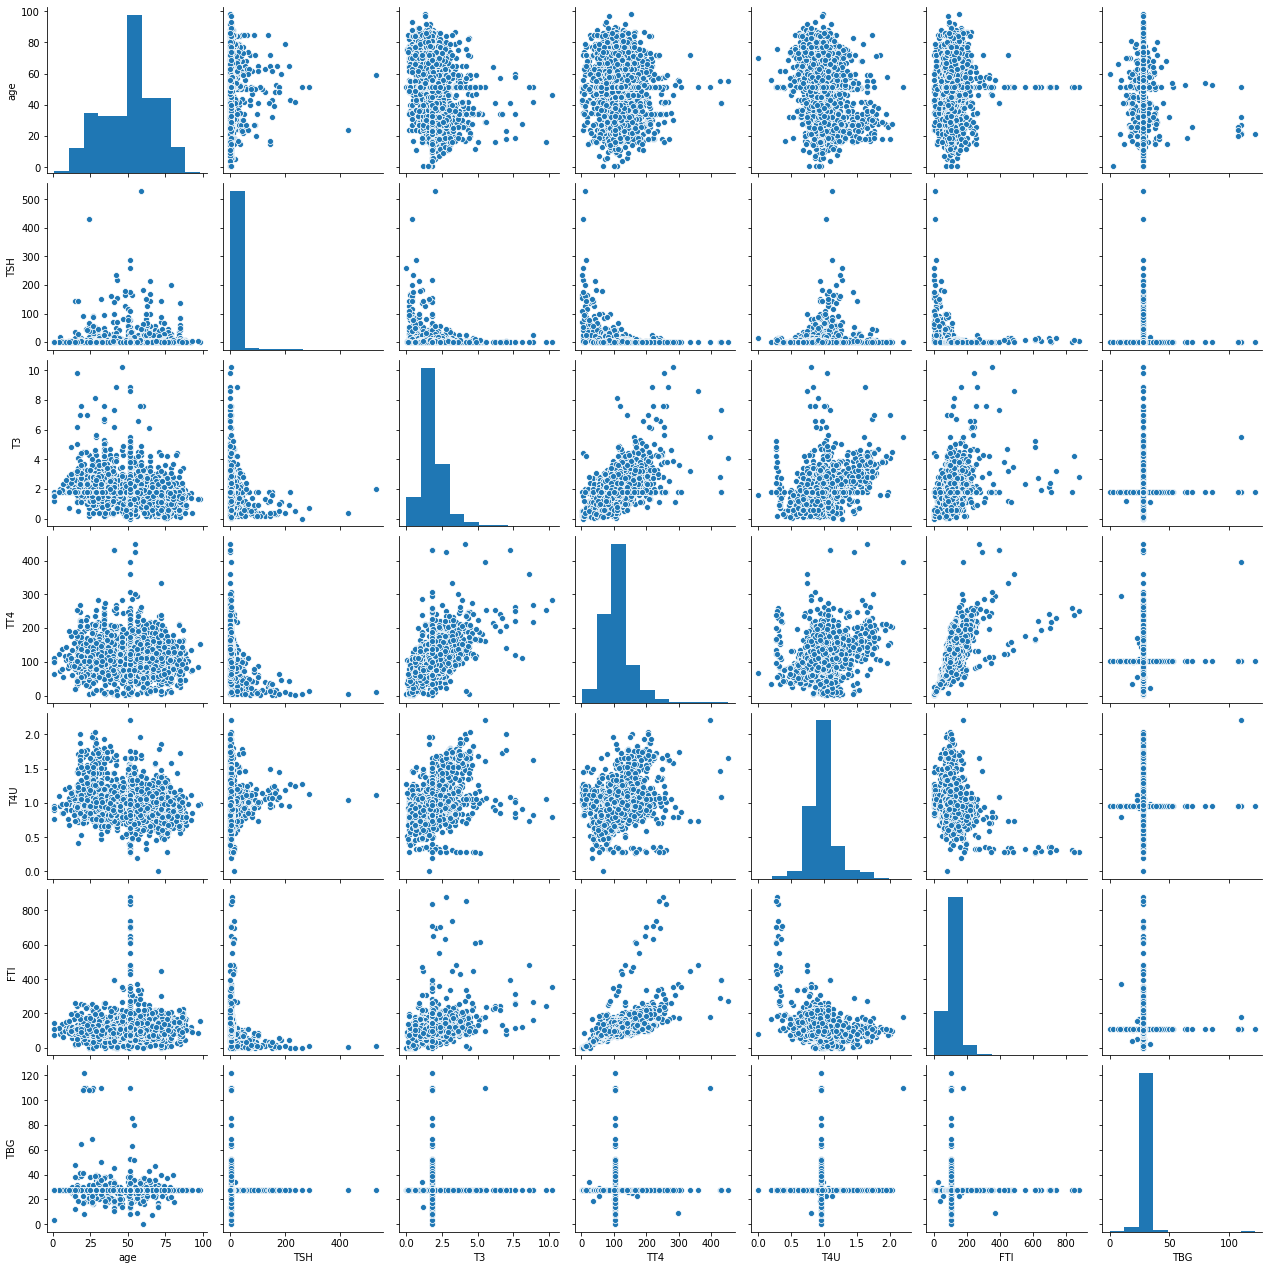

In [ ]:
# using a pairplot to compare relationship between the variables 
sns.pairplot(data= hypo)

TT4 and FTI  have a linear relation, T3 & FTI too have linear realtion, calculation of FTI relies on TT4 & T3, which explains this relation.

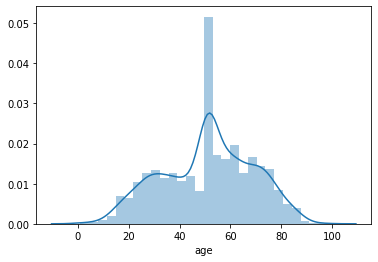

In [15]:
# looking at distribution of age 
sns.distplot(hypo.age)

the age peak is between 40 and 60. the numbers increases at the age of 20 to 80.


In [ ]:
#we use describe to check the dispersions of the columns 
hypo.describe(include = 'all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3086,3086.000000,3086,3086,3086,3086,3086,3086,3086,3086,3086,3086,3086,3086,3086,3086.000000,3086,3086.000000,3086,3086.000000,3086,3086.000000,3086,3086.000000,3086,3086.000000
unique,2,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN
top,negative,NaN,F,f,f,f,f,f,f,f,f,f,f,f,y,NaN,y,NaN,y,NaN,y,NaN,y,NaN,n,NaN
freq,2945,NaN,2192,2640,3031,3044,2983,2851,2851,3025,2989,3046,3084,2990,2631,NaN,2406,NaN,2846,NaN,2847,NaN,2848,NaN,2835,NaN
mean,NaN,51.118453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.056001,NaN,1.904213,NaN,108.340862,NaN,0.976199,NaN,114.834381,NaN,28.249708
std,NaN,17.854437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.254865,NaN,0.866600,NaN,42.855021,NaN,0.216924,NaN,57.825349,NaN,5.592197
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,2.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
25%,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.500000,NaN,85.000000,NaN,0.860000,NaN,92.000000,NaN,28.000000
50%,NaN,51.154214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700000,NaN,1.800000,NaN,104.000000,NaN,0.960000,NaN,107.000000,NaN,28.000000
75%,NaN,64.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000,NaN,2.200000,NaN,124.000000,NaN,1.050000,NaN,126.000000,NaN,28.000000


from above, we can see we have a total count of 3086 rows.

the age mean is 51.118453, we have 2 unique values in the status of hypothyroid.

min age is 1 yr and max is 98yrs

most people are negative for hypothyroidism


negative       2945
hypothyroid     141
Name: status, dtype: int64


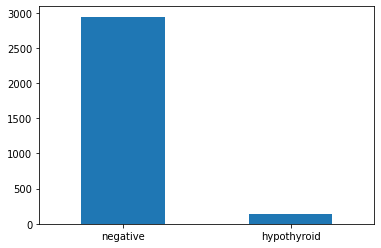

In [ ]:
#counting the number of people who have tested negative and those who are hypothyroid.
hypo.status.value_counts().plot(kind = 'bar', rot = 0)
print(hypo.status.value_counts())

from the graph, a small number has hypothyroidism.
141 have and 2945 tested negative for it.

hypothyroidism is a rare case but it does occur.

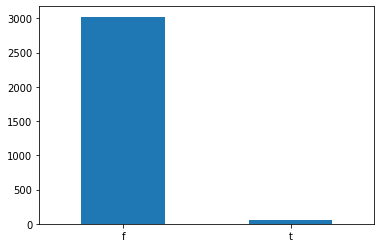

In [ ]:
# distribution of pregnancy
hypo.pregnant.value_counts().plot(kind = 'bar', rot = 0)

from above, we can see that most of the patients who are pregnant  do not suffer from hypothyroidism, this makes it hard to conclude that pregnant women have a high chance of suffering from hypothyroidism.

In [ ]:
#grouping each gender if they are pregnant or not.
hypo.groupby('pregnant').sex.value_counts()

pregnant  sex
f         F      2131
          M       894
t         F        61
Name: sex, dtype: int64

it is obvious no man is pregnant, as we expected, 2131 females not pregnant and only 61 pregnant. 

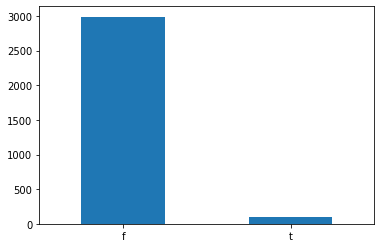

In [ ]:
# distribution of goitre
hypo.goitre.value_counts().plot(kind = 'bar', rot = 0)

a small number of patients have goitre, most of them did test negative for the same. 

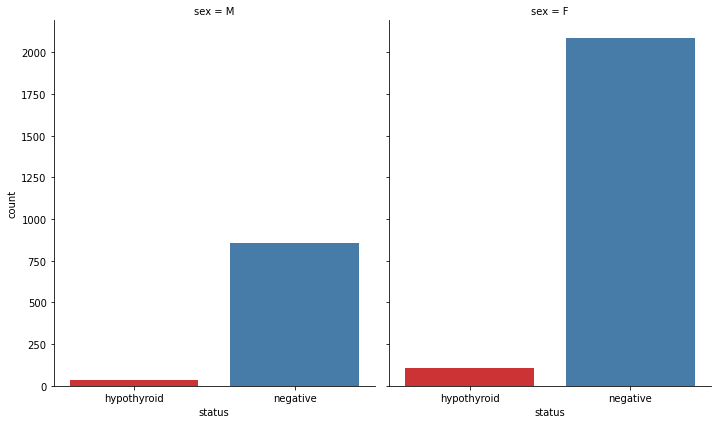

In [ ]:
#comparing the status of each gender.
sns.catplot("status", col="sex", col_wrap=4, data=hypo, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

from our graph, we have more females compared to men. the number of females who have hypothyroididsm are more compared to male, the ratio could tell a different thing.

In [23]:
# splitting age into  age groups to get a deeper understanding of our data.
conditions = [
    ((hypo.age >= 0) & (hypo.age <= 9)),
    ((hypo.age >= 10) & (hypo.age <= 19)),
    ((hypo.age >= 20) & (hypo.age <= 29)),
    ((hypo.age >= 30) & (hypo.age <= 39)),
    ((hypo.age >= 40) & (hypo.age <= 49)),
    ((hypo.age >= 50) & (hypo.age <= 59)),
    ((hypo.age >= 60) & (hypo.age <= 69)),
    ((hypo.age >= 70) & (hypo.age <= 79)),
    ((hypo.age >= 80) & (hypo.age <= 89)),
    ((hypo.age >= 90) & (hypo.age <= 98))
]

choices = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9','G10']
#create a column that stores our new data
hypo['age_rn'] = np.select(conditions, choices)

[Text(0, 0.5, 'Status'),
 Text(0.5, 1.0, 'relation between the age and hypothyroidism')]

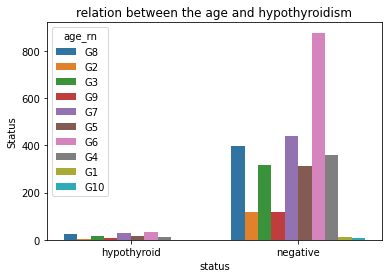

In [24]:
#plot a graph to show the distribution of hypothyroidism across different ages.
hypo_age = sns.countplot('status', hue = 'age_rn', data = hypo)
hypo_age.set(title = "relation between the age and hypothyroidism", ylabel = "Status")

the hypothyroid does not tell alot, since the numbers are low but G6 has the most numbers compared to the rest of the groups with hypothyroidism.


In [ ]:
#checking the correlation
corr = hypo.corr()
corr

,age,TSH,T3,TT4,T4U,FTI,TBG
age,1.000000,0.009180,-0.253888,-0.082560,-0.186146,0.022734,-0.063785
TSH,0.009180,1.000000,-0.168365,-0.307814,0.074268,-0.239845,-0.008356
T3,-0.253888,-0.168365,1.000000,0.529258,0.384988,0.279011,0.015203
TT4,-0.082560,-0.307814,0.529258,1.000000,0.320807,0.677725,0.022698
T4U,-0.186146,0.074268,0.384988,0.320807,1.000000,-0.293274,0.024589
FTI,0.022734,-0.239845,0.279011,0.677725,-0.293274,1.000000,-0.005188
TBG,-0.063785,-0.008356,0.015203,0.022698,0.024589,-0.005188,1.000000


the relation to itself is 1, has expected.
TBG,T4U,TT4,T3 have an inverse relation to age.

In [ ]:
# Categorical columns list
cat_cols = ['status', 'sex','tsh_measured', 't3_measured', 'tt4_measured',\
            't4u_measured', 'fti_measured', 'tbg_measured']

for column in hypo.columns:
  if column in cat_cols:
    hypo[column] = hypo[column].astype('int')

In [26]:
#we now drop the age_rn column 
hypo.drop('age_rn', axis =1,inplace =True)

In [27]:
hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

##MODELLING

Random Forest.
 

In [ ]:
#previewing our data to see if the rows are all numerical
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,28.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,28.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,28.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,28.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,28.0


some of the columns are not numerical. we are goint to encode them.

In [28]:
#we use a label encoder to encode our variables.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder
hypo_encoded = hypo.apply(le().fit_transform)

In [29]:
#confirming our data is now in numerics
hypo_encoded.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,70,1,0,0,0,0,0,0,0,0,0,0,0,1,165,1,7,1,22,1,116,1,19,0,23
1,0,12,0,1,0,0,0,0,0,0,0,0,0,0,1,221,1,18,1,26,1,81,1,26,0,23
2,0,21,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,1,5,1,68,1,0,0,23
3,0,21,0,0,0,0,0,0,0,0,0,0,0,0,1,237,1,5,1,8,1,72,1,9,0,23
4,0,75,1,0,0,0,0,0,0,0,0,0,0,0,1,106,1,13,1,63,1,96,1,48,0,23


our data is now good to fit to a model.

In [67]:
#importing the libraries we will need
#Import Random Forest 
#import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [68]:
from sklearn.metrics import confusion_matrix

our focus is on the status, if someone is negative or has hypothyroid.

In [76]:
#separating our variables, to independent and dependent
y = hypo_encoded['status'].values
#storing our test features 
test_features = hypo_encoded.columns.to_list()

test_features.remove('status')
X = hypo_encoded[test_features].values

In [77]:
 #we train our model using 80% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#checking the shape our our test data
print(X.shape)
print(y.shape)

(3086, 25)
(3086,)


we now create our model and assess the accuracy.

In [78]:
#create a classifier with 100 estimators
forest=RandomForestClassifier(n_estimators=100)


In [79]:
#Train the model using the training the sets
forest.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
#using the model to make predictions 
y_pred=forest.predict(X_test)

In [81]:
from sklearn import metrics
# check model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9935205183585313


our model is 99% accurate. it is good for a baseline model, we cannot rely on it much because it could be overfit,

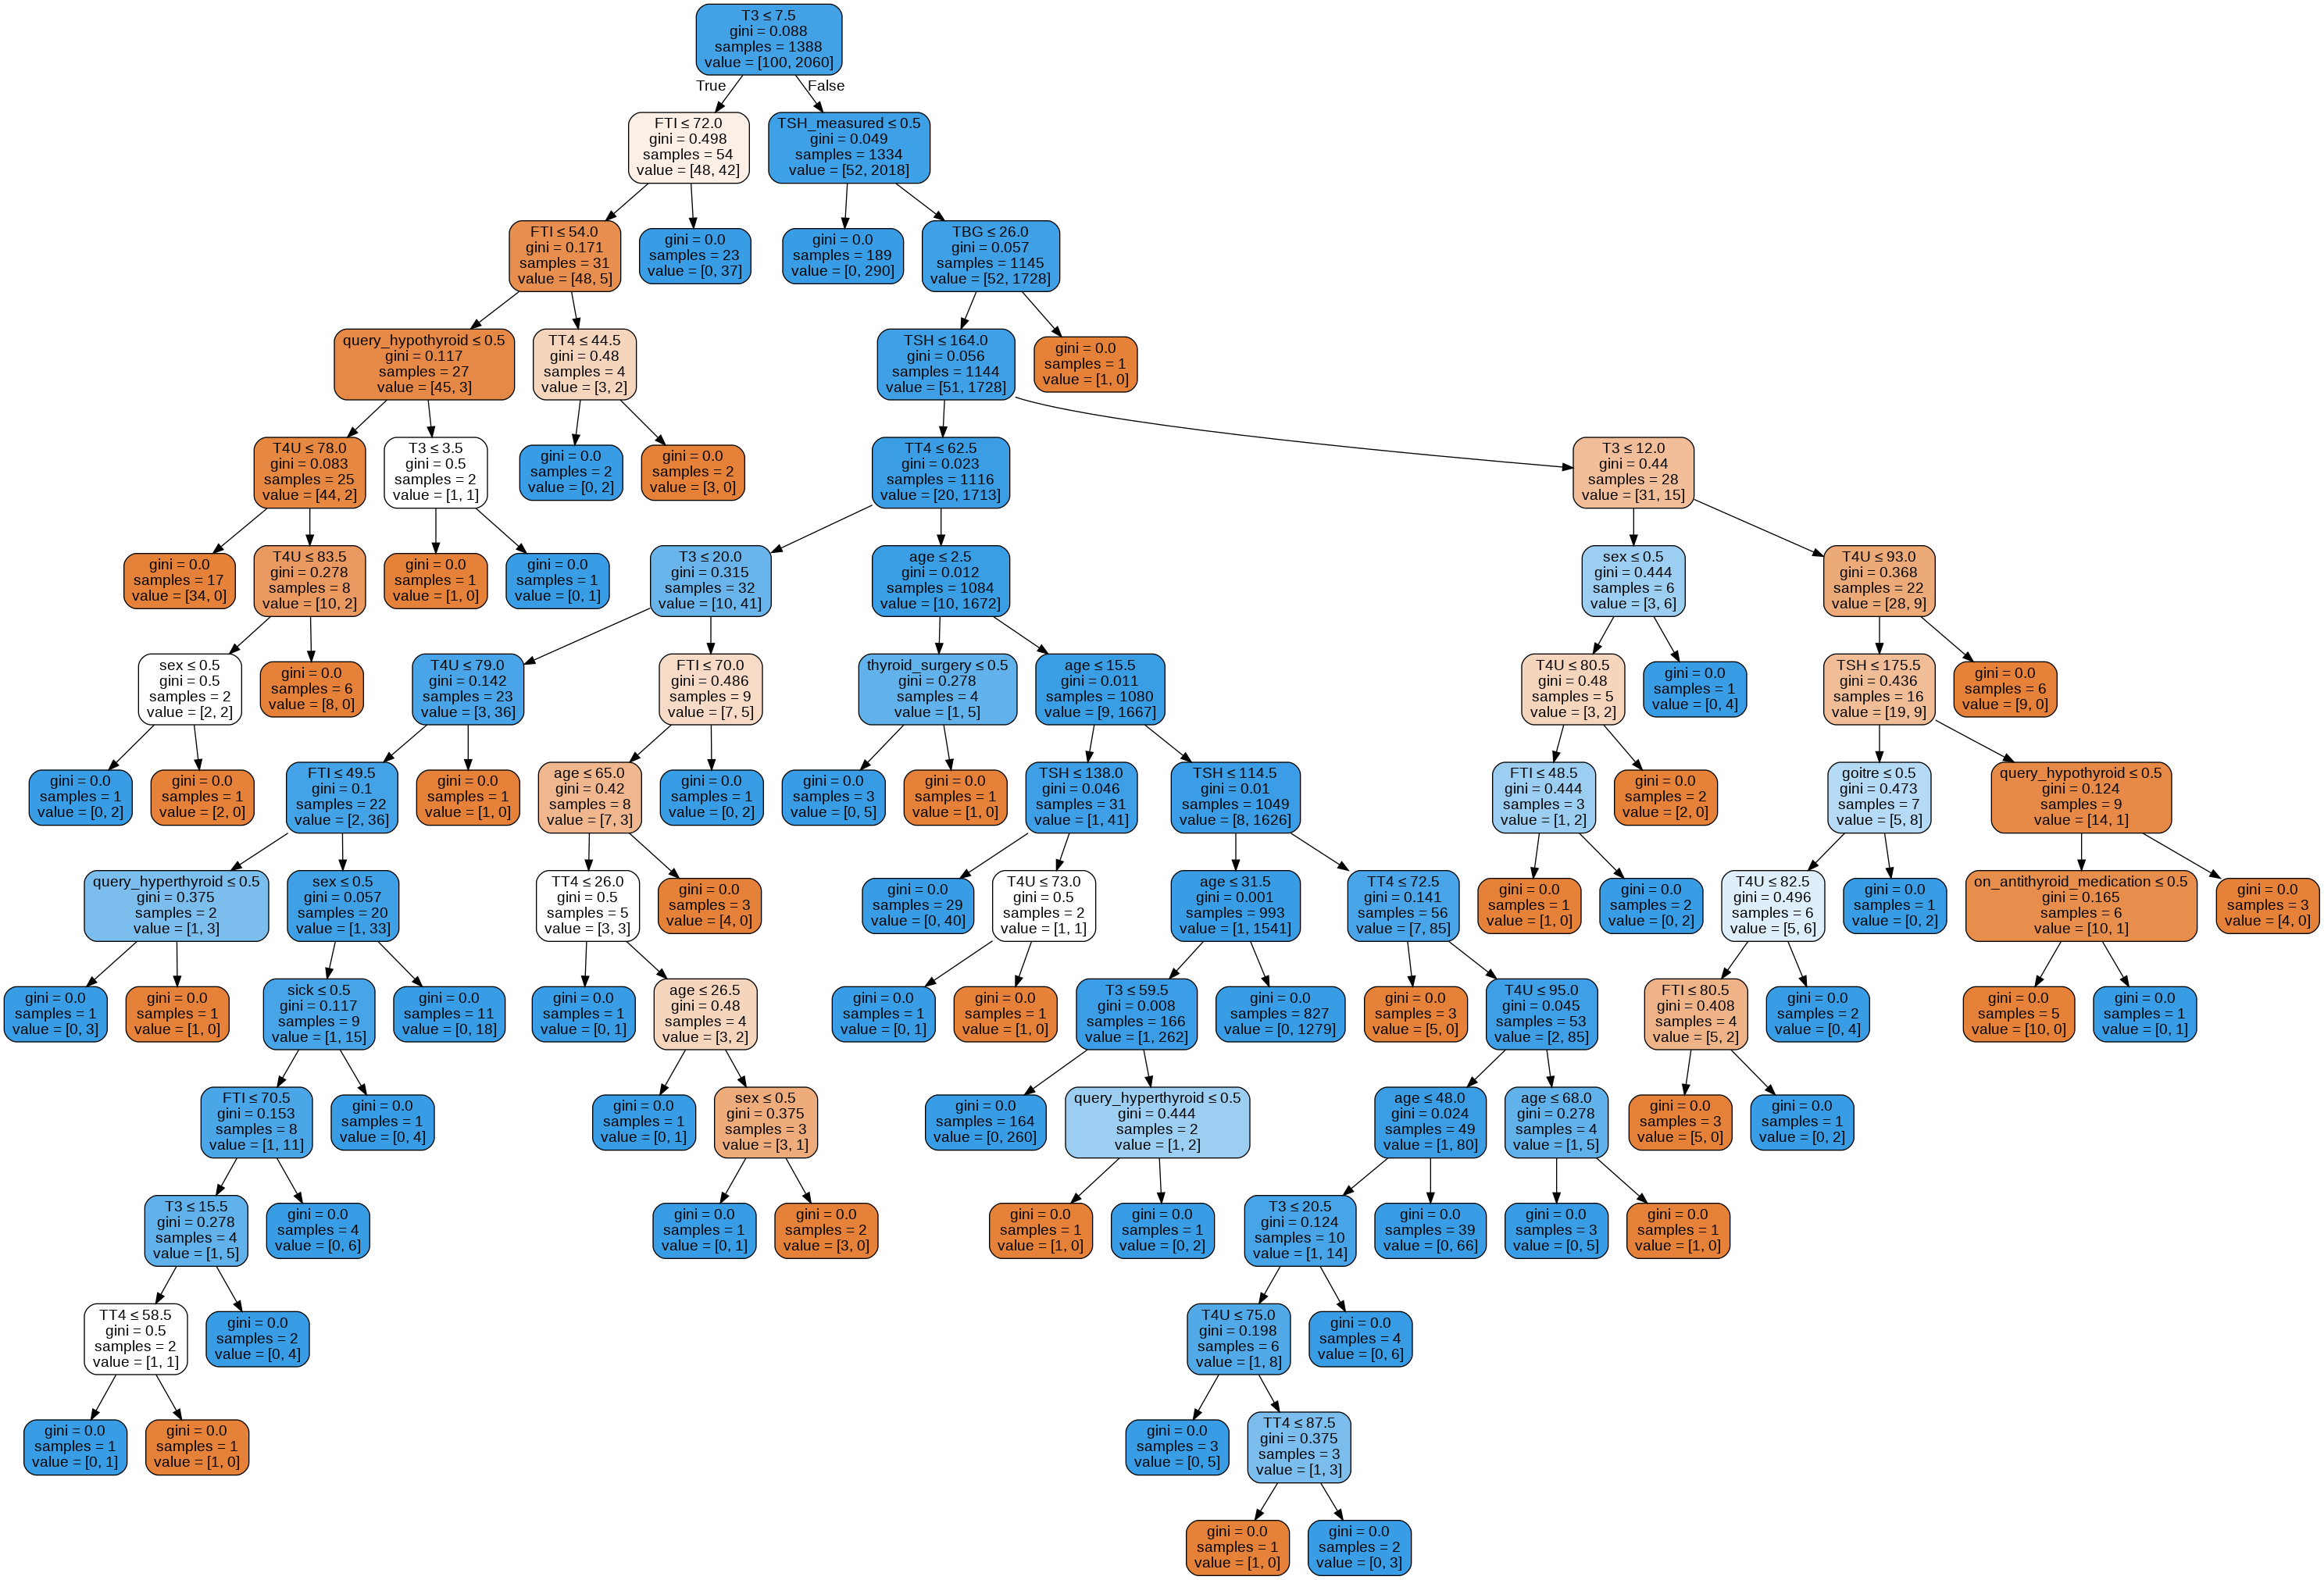

In [82]:
# we want to look at our 50th tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())


our gini reduced to zero at the bottom, our model is looking good. our other trees haveal,ost the same but could vary the values.

In [37]:
# compare actual values with predicted values
compare = pd.DataFrame({'Actual' : y_test.flatten(),
                        'Predicted' : y_pred.flatten()})

# previewing our head
compare.head()

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


our prediction looks good. we cannot entirely conclude because we are not able to see each prediction, we can judge our model better using the summary statistics

In [38]:
#we can also check our summary statistics
compare.describe()

,Actual,Predicted
count,926.000000,926.000000
mean,0.957883,0.960043
std,0.200964,0.195964
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


our prediction is very close to the actual, the difference in the mean and standard deviation is very small. we want our prediction to be equal to the actual. we can get the important features and use it for prediction.

In [ ]:
# Get numerical feature importances
importances = list(forest.feature_importances_)

# We now  connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]
#we sort values in descending order to get the most important.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# we then print them them out.
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: FTI                  Importance: 0.33
Variable: TT4                  Importance: 0.24
Variable: TSH                  Importance: 0.22
Variable: T3                   Importance: 0.07
Variable: T4U                  Importance: 0.04
Variable: age                  Importance: 0.03
Variable: on_thyroxine         Importance: 0.01
Variable: on_antithyroid_medication Importance: 0.01
Variable: thyroid_surgery      Importance: 0.01
Variable: query_hypothyroid    Importance: 0.01
Variable: TSH_measured         Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: T3_measured          Importance: 0.0
Variable: TT4_measured         Importance: 0

from above, we can see that the variables with the highest importance is FTI, then TT4,TSH,T3,T4U,age in that order then the rest. we can visualise this as seen below.

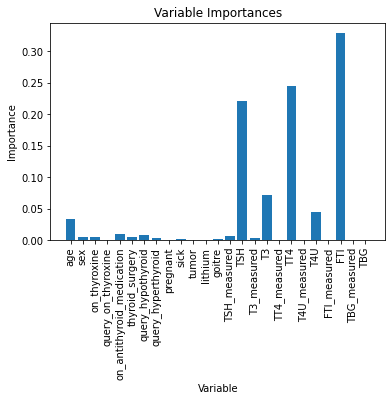

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

we can clearly see the important features from above. we now use that to make predictions.

In [46]:
#remodelling with the most important features only


y = hypo_encoded['status'].values
#storing our test features 
test_features = ['FTI','TT4','TSH','T3','T4U','age']
X = hypo_encoded[test_features].values

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Instantiating the model
#fitting our variables in the model
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
# Making predictions
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {metrics.accuracy_score(y_test, y_pred)} ')
print('\n')

The accuracy score is: 0.9935205183585313 




the accuracy of our model remains the same even when we use important features only, 0.99352

In [48]:
#use the confusion matrix to assess the model
confusion_matrix(y_test, y_pred)

array([[ 35,   4],
       [  2, 885]])

from above we can see that only elements were wrongly placed. our model is doing well.

Ada Boost

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

#to use adaboost, we need a decison tree in place
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#create a decision tree classifier.
tree = DecisionTreeRegressor(max_depth=4)

# Train it on our training set.
tree = tree.fit(X_train, y_train)

#we make predictions using our trained model.
y_pred_tree = tree.predict(X)

In [59]:
from sklearn.ensemble import AdaBoostRegressor

# creating our classifier with 200 trees of depth 1
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 1), 
                            n_estimators = 200)

# fitting our model to our training data
ada_reg.fit(X_train, y_train)

# making predictions
y_pred = ada_reg.predict(X_test)

# comparing actual values to predicted values
ada_compare = pd.DataFrame({'Actual' : y_test.flatten(),
                        'Predicted' : y_pred.flatten()})

# previewing our summary statistics
ada_compare.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.959547,0.953475
std,0.197179,0.136817
min,0.000000,0.236601
25%,1.000000,0.986494
50%,1.000000,0.986494
75%,1.000000,0.986494
max,1.000000,0.986494


from above, we can see that our prediction has a small margin difference with the actual, the model is doing good.

Gradient Boosting

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=2)
# fitting to training data
gbr = gbr.fit(X_train, y_train)
# making predictions
y_pred_gbr = gbr.predict(X_test)

In [65]:
# comparing actual values to predicted values
gb_compare = pd.DataFrame({'Actual' : y_test.flatten(),
                        'Predicted' : y_pred_gbr.flatten()})

# previewing our summary statistics
gb_compare.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.959547,0.959643
std,0.197179,0.174810
min,0.000000,-0.132364
25%,1.000000,1.000288
50%,1.000000,1.000288
75%,1.000000,1.000288
max,1.000000,1.038744


our model is doing better than adaboost, from the look, the difference in actual and predicted values is smaller. our model is good.

SUPPORT VECTOR MACHINE

Linear kernels

In [84]:
#splitting our dataset to dependent and independent variables
X = hypo_encoded.drop(columns = 'status').values
y = hypo_encoded['status'].values
#checking the shape of our dataset
print(X.shape)
print(y.shape)

(3086, 25)
(3086,)


In [85]:
#we use PCA to reduce the number of variables to 3
from sklearn.decomposition import PCA
pca = PCA(n_components = 3).fit(X)
X = pca.transform(X)
X.shape

(3086, 3)

In [86]:
# we now split our data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [87]:
# we build our model
#

from sklearn.svm import SVC
linear = SVC(kernel = 'linear')

# fitting to training data to our testing set
linear.fit(X_train, y_train)

# making predictions using our model
y_pred = linear.predict(X_test)


In [88]:
#checking the accuracy of our data
print("Linear kernel score:", metrics.accuracy_score(y_test, y_pred))

Linear kernel score: 0.9870550161812298


our model has an accuracy of 0.98, it is doing good.

polynomial kernel

In [89]:
# we now  fit our training data to a polynomial
#we set our gamma to auto to get the best gamma for our data
poly = SVC(kernel = 'poly', gamma = 'auto')

# training the model
poly.fit(X_train, y_train)

# making prediction
y_pred = poly.predict(X_test)


In [ ]:
#checking the accuracy of our model.
print("Polynomial kernel score:", metrics.accuracy_score(y_test, y_pred))


Polynomial kernel score: 0.9805825242718447


our linear kernel is doing better than the polynomial using the scores to compare. 0.980 and linear is 0.987

RBF

In [ ]:
# now doing it with rbf kernel
rbf = SVC(kernel = 'rbf', gamma = 'auto')

# training the model
rbf.fit(X_train, y_train)

# making prediction
y_pred = rbf.predict(X_test)


In [ ]:
print("rbf kernel score:", metrics.accuracy_score(y_test, y_pred))

rbf kernel score: 0.9805825242718447


our rbf kernel is 0.9805, this is a good accuracy.the rbf is has an acccuracy similsr to that of polynomial.. our model generally did great.

Sigmoid kernel

In [ ]:
# finally doing it with the sigmoid kernel
sig = SVC(kernel = 'sigmoid', gamma = 'auto')

# training the model
sig.fit(X_train, y_train)

# making prediction
sig_y_pred = sig.predict(X_test)



In [ ]:
# checking the accuracy of our model
print("Sigmoid kernel score:", metrics.accuracy_score(y_test, sig_y_pred))

Sigmoid kernel score: 0.9288025889967637


our sigmoid accuracy score is 0.92, this is the lowest compared to the other models above, we can use a confusion matrix to further evaluate  our model.

In [ ]:
#we further evaluate our model using a confusion matrix.
confusion_matrix = confusion_matrix(y_test, sig_y_pred)
confusion_matrix


array([[  0,  25],
       [ 19, 574]])

19 and 25 elements were wrongly placed, this explains the drop in the accuracy of our model.

Conclusion and Challenging the solution.

In conclusion, our models did well, our metric of success was met, the accuracy of each model was above 92%. 

the model would have done better if the dataset did not have so many missing values, the data too was biased, the ratio of male to female was not 50,50

the people who tested positive for hypothyroidism was also too small, considering our question is to determine if the symptoms indicated the patient has hypothyroidism.

the dataset too did not have column description for better understanding of the variables.
researching on hypothyroidism only explained the hormones, general knowledge to deduce other variables like gender, but other variable names were not so clear i.e query_on_thyroxine and on_thyroxine

varying  the parameters i used to see the perfomance of my model would have helped in rating the models.
i feel my model would have given more accurate predictions if the above were corrected.
